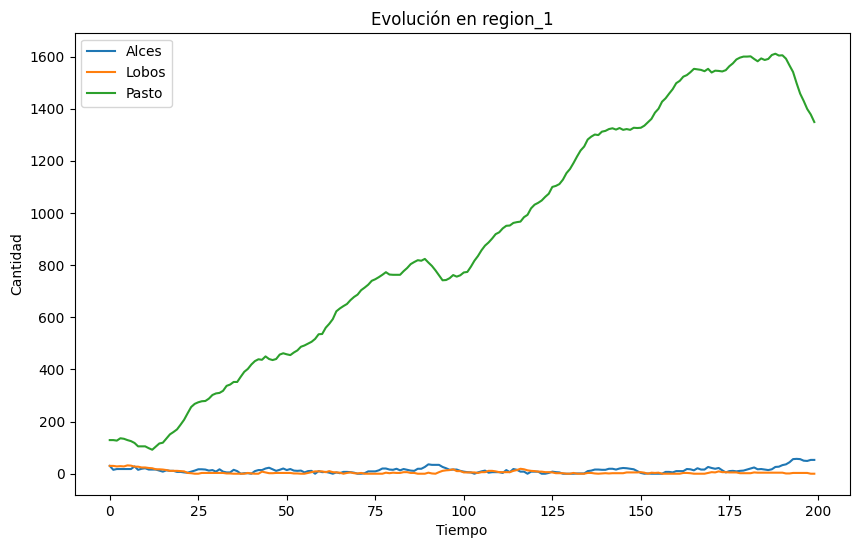

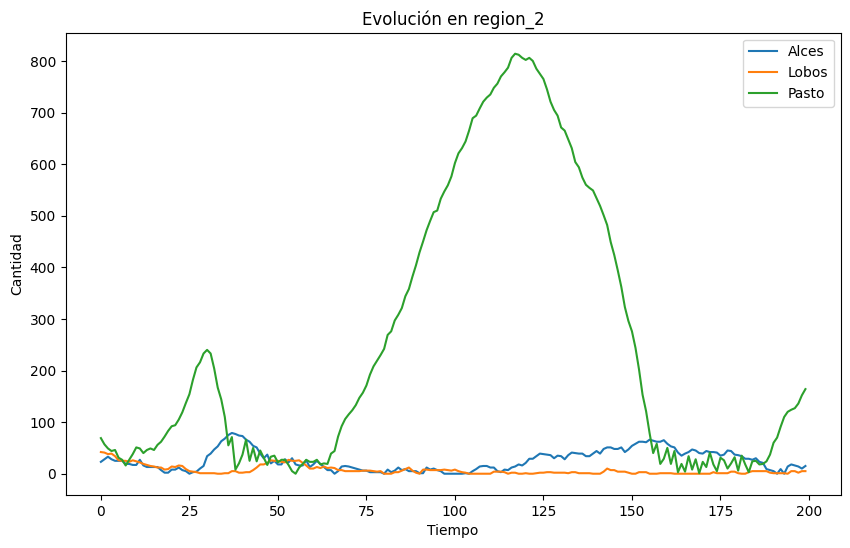

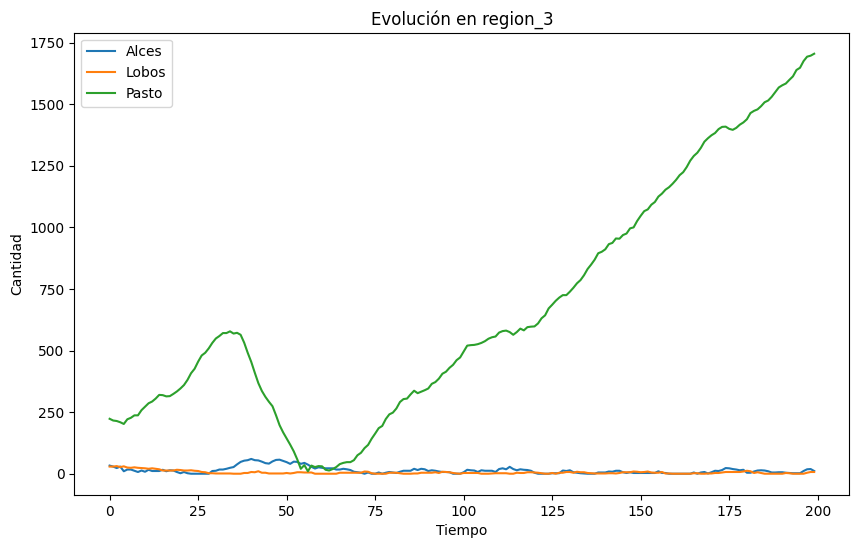

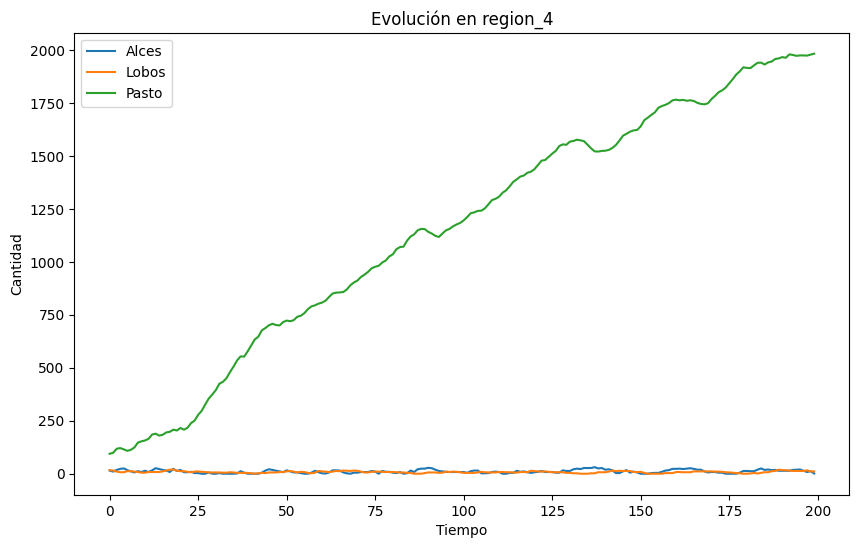

In [1]:
import random
import matplotlib.pyplot as plt

class EcosistemaGrafo:
    def __init__(self):
        # Define las regiones como nodos y sus conexiones (aristas)
        self.regiones = {
            'region_1': {'alces': 50, 'lobos': 30, 'pasto': 150},
            'region_2': {'alces': 45, 'lobos': 35, 'pasto': 100},
            'region_3': {'alces': 40, 'lobos': 25, 'pasto': 250},
            'region_4': {'alces': 20, 'lobos': 20, 'pasto': 100}
        }
        
        # Define el grafo (conexiones entre las regiones)
        self.grafo = {
            'region_1': ['region_2', 'region_3'],
            'region_2': ['region_1', 'region_4'],
            'region_3': ['region_1', 'region_4'],
            'region_4': ['region_2', 'region_3']
        }
        
        # Datos para gráficos
        self.datos_grafico = {region: {'alces': [], 'lobos': [], 'pasto': []} for region in self.regiones}

    def crecer_pasto(self, region):
        self.regiones[region]['pasto'] += random.randint(10, 30)

    def alimentar_alces(self, region):
        alces = self.regiones[region]['alces']
        pasto = self.regiones[region]['pasto']
        
        if pasto >= alces:
            self.regiones[region]['pasto'] -= alces
            if random.random() < 0.3:
                self.regiones[region]['alces'] += random.randint(1, 10)
        else:
            self.regiones[region]['alces'] -= random.randint(1, 2)

        if random.random() < 0.1:
            self.regiones[region]['alces'] -= random.randint(1, 3)
        
        self.regiones[region]['alces'] = max(self.regiones[region]['alces'], 0)

    def alimentar_lobos(self, region):
        lobos = self.regiones[region]['lobos']
        alces = self.regiones[region]['alces']
        
        if alces >= lobos:
            self.regiones[region]['alces'] -= lobos // 2
            if random.random() < 0.2:
                self.regiones[region]['lobos'] += random.randint(1, 5)
        else:
            self.regiones[region]['lobos'] -= random.randint(1, 2)

        if random.random() < 0.15:
            self.regiones[region]['lobos'] -= random.randint(1, 2)
        
        self.regiones[region]['lobos'] = max(self.regiones[region]['lobos'], 0)

    def mover_alces(self, region_origen, region_destino):
        alces_a_mover = min(5, self.regiones[region_origen]['alces'])
        self.regiones[region_origen]['alces'] -= alces_a_mover
        self.regiones[region_destino]['alces'] += alces_a_mover

    def mover_lobos(self, region_origen, region_destino):
        lobos_a_mover = min(3, self.regiones[region_origen]['lobos'])
        self.regiones[region_origen]['lobos'] -= lobos_a_mover
        self.regiones[region_destino]['lobos'] += lobos_a_mover

    def simular_paso(self):
        for region in self.regiones:
            self.crecer_pasto(region)
            self.alimentar_alces(region)
            self.alimentar_lobos(region)

        for region_origen in self.grafo:
            for region_destino in self.grafo[region_origen]:
                if random.random() < 0.2:
                    self.mover_alces(region_origen, region_destino)
                if random.random() < 0.1:
                    self.mover_lobos(region_origen, region_destino)

        # Guardar los datos de cada paso para el gráfico
        for region, datos in self.regiones.items():
            self.datos_grafico[region]['alces'].append(datos['alces'])
            self.datos_grafico[region]['lobos'].append(datos['lobos'])
            self.datos_grafico[region]['pasto'].append(datos['pasto'])

    def simular(self, duracion):
        for t in range(1, duracion + 1):
            self.simular_paso()
        
        # Graficar los datos
        self.graficar_datos()

    def graficar_datos(self):
        for region, datos in self.datos_grafico.items():
            plt.figure(figsize=(10, 6))
            plt.plot(datos['alces'], label='Alces')
            plt.plot(datos['lobos'], label='Lobos')
            plt.plot(datos['pasto'], label='Pasto')
            plt.xlabel("Tiempo")
            plt.ylabel("Cantidad")
            plt.title(f"Evolución en {region}")
            plt.legend()
            plt.show()

# Crear instancia del ecosistema y simular
ecosistema = EcosistemaGrafo()
ecosistema.simular(200)
